# Dataset creation and preprocessing 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
dataset={
    'Age':[25,45,34,None,29,50,31,22,None,40],
    'Income':[50,120,None,70,80,None,60,45,55,110],
    'Credit_Score':[720,680,710,600,650,580,None,750,640,700],
    'Marital_Status':['Single','Married','Single','Divorced','Married','Married','Single','Single','Divorced','Married'],
    'Employment_Status':['Employed','Employed','Student','Unemployed','Employed','Unemployed','Emplayed','Student','Unemployed','Employed'],
    'Loan_Amount':[10,50,15,25,20,40,30,5,18,35],
    'Loan_Term':[36,60,48,None,24,72,36,1,48,None],
    'Risk_Category':['Low','Medium','Medium','High','Low','High','Medium','Low','High','Medium']
}

In [3]:
data=pd.DataFrame(dataset)
data

,Age,Income,Credit_Score,Marital_Status,Employment_Status,Loan_Amount,Loan_Term,Risk_Category
0,25.0,50.0,720.0,Single,Employed,10,36.0,Low
1,45.0,120.0,680.0,Married,Employed,50,60.0,Medium
2,34.0,NaN,710.0,Single,Student,15,48.0,Medium
3,NaN,70.0,600.0,Divorced,Unemployed,25,NaN,High
4,29.0,80.0,650.0,Married,Employed,20,24.0,Low
5,50.0,NaN,580.0,Married,Unemployed,40,72.0,High
6,31.0,60.0,NaN,Single,Emplayed,30,36.0,Medium
7,22.0,45.0,750.0,Single,Student,5,1.0,Low
8,NaN,55.0,640.0,Divorced,Unemployed,18,48.0,High
9,40.0,110.0,700.0,Married,Employed,35,NaN,Medium


## handling missing values

In [4]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Credit_Score']=data['Credit_Score'].fillna(data['Credit_Score'].mean())
data['Income']=data['Income'].fillna(data['Income'].mean())
data['Loan_Term']=data['Loan_Term'].fillna(data['Loan_Term'].mean())
data

,Age,Income,Credit_Score,Marital_Status,Employment_Status,Loan_Amount,Loan_Term,Risk_Category
0,25.0,50.00,720.0,Single,Employed,10,36.000,Low
1,45.0,120.00,680.0,Married,Employed,50,60.000,Medium
2,34.0,73.75,710.0,Single,Student,15,48.000,Medium
3,34.5,70.00,600.0,Divorced,Unemployed,25,40.625,High
4,29.0,80.00,650.0,Married,Employed,20,24.000,Low
5,50.0,73.75,580.0,Married,Unemployed,40,72.000,High
6,31.0,60.00,670.0,Single,Emplayed,30,36.000,Medium
7,22.0,45.00,750.0,Single,Student,5,1.000,Low
8,34.5,55.00,640.0,Divorced,Unemployed,18,48.000,High
9,40.0,110.00,700.0,Married,Employed,35,40.625,Medium


## z-score normalization

In [5]:
scaler=StandardScaler()
for col in data.columns:
    if type(data[col][0])!=type(str()):
        data[col]=scaler.fit_transform(data[[col]])
        # print(col,type(data[col][0]),type(str()))
data

,Age,Income,Credit_Score,Marital_Status,Employment_Status,Loan_Amount,Loan_Term,Risk_Category
0,-1.160610,-1.018507,0.984374,Single,Employed,-1.111307,-0.252394,Low
1,1.282779,1.983408,0.196875,Married,Employed,1.892225,1.057327,Medium
2,-0.061085,0.000000,0.787499,Single,Student,-0.735865,0.402467,Medium
3,0.000000,-0.160817,-1.378124,Divorced,Unemployed,0.015018,0.000000,High
4,-0.671932,0.268028,-0.393750,Married,Employed,-0.360424,-0.907255,Low
5,1.893626,0.000000,-1.771873,Married,Unemployed,1.141342,1.712188,High
6,-0.427593,-0.589662,0.000000,Single,Emplayed,0.390459,-0.252394,Medium
7,-1.527118,-1.232929,1.574998,Single,Student,-1.486748,-2.162405,Low
8,0.000000,-0.804084,-0.590624,Divorced,Unemployed,-0.510600,0.402467,High
9,0.671932,1.554563,0.590624,Married,Employed,0.765900,0.000000,Medium


## label-encoding

In [6]:
encoder=LabelEncoder()
for col in data.columns:
    if type(data[col][0])==type(str()):
        data[col]=encoder.fit_transform(data[col])
data

,Age,Income,Credit_Score,Marital_Status,Employment_Status,Loan_Amount,Loan_Term,Risk_Category
0,-1.160610,-1.018507,0.984374,2,1,-1.111307,-0.252394,1
1,1.282779,1.983408,0.196875,1,1,1.892225,1.057327,2
2,-0.061085,0.000000,0.787499,2,2,-0.735865,0.402467,2
3,0.000000,-0.160817,-1.378124,0,3,0.015018,0.000000,0
4,-0.671932,0.268028,-0.393750,1,1,-0.360424,-0.907255,1
5,1.893626,0.000000,-1.771873,1,3,1.141342,1.712188,0
6,-0.427593,-0.589662,0.000000,2,0,0.390459,-0.252394,2
7,-1.527118,-1.232929,1.574998,2,2,-1.486748,-2.162405,1
8,0.000000,-0.804084,-0.590624,0,3,-0.510600,0.402467,0
9,0.671932,1.554563,0.590624,1,1,0.765900,0.000000,2


## divide dependent and independent attributes

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

## split into test and train sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

# Classification

In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import matplotlib.pyplot as plt

In [39]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=3,min_samples_split=2,min_samples_leaf=1,max_depth=None)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

## plot the decision-tree

[Text(0.4, 0.8333333333333334, 'Loan_Amount <= -0.924\nentropy = 1.379\nsamples = 7\nvalue = [1, 2, 4]\nclass = Medium'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Low'),
 Text(0.6, 0.5, 'Employment_Status <= 2.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 0, 4]\nclass = Medium'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = Medium'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = High')]

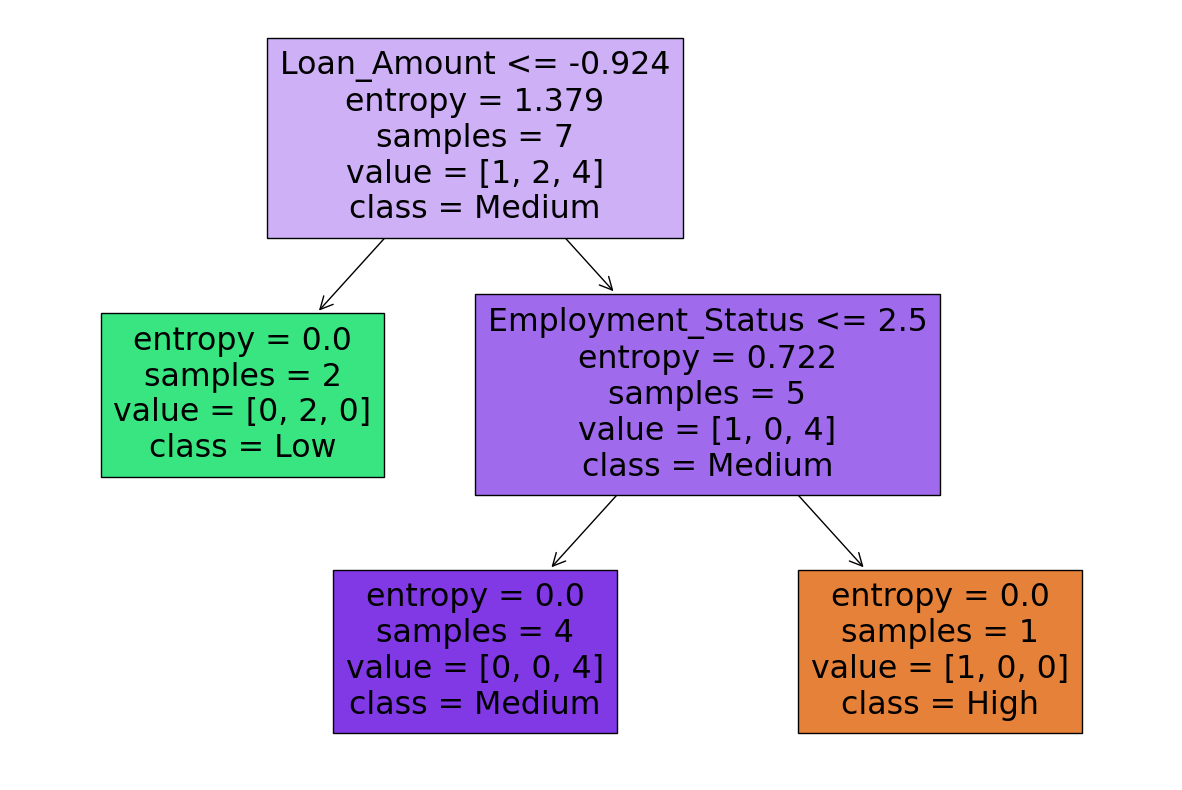

In [38]:
plt.figure(figsize=[15,10])
plot_tree(classifier,feature_names=x.columns,class_names=encoder.classes_,filled=True)

## draw the rules

In [13]:
tree_rules=export_text(classifier,feature_names=x.columns,class_names=encoder.classes_)
print(tree_rules)

|--- Loan_Amount <= -0.92
|   |--- class: Low
|--- Loan_Amount >  -0.92
|   |--- Employment_Status <= 2.50
|   |   |--- class: Medium
|   |--- Employment_Status >  2.50
|   |   |--- class: High



# Prediction and metrics

## prediction

In [15]:
y_pred=classifier.predict(x_test)

In [16]:
print(encoder.inverse_transform(y_pred),encoder.inverse_transform(y_test))

['High' 'High' 'Medium'] ['High' 'High' 'Low']


## metrics

In [17]:
from sklearn.metrics import accuracy_score,classification_report,mean_absolute_error,mean_squared_error,r2_score,f1_score

In [18]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



/home/gitpod/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gitpod/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gitpod/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gitpod/anaconda

In [20]:
mean_absolute_error(y_test,y_pred)

0.3333333333333333

In [21]:
mean_squared_error(y_test,y_pred)

0.3333333333333333

In [22]:
r2_score(y_test,y_pred)

-0.4999999999999998

In [23]:
f1_score(y_test,y_pred,average='micro')

0.6666666666666666

## Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [30]:
conf_matrix = confusion_matrix(y_test,y_pred,labels=classifier.classes_)
conf_matrix

array([[2, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

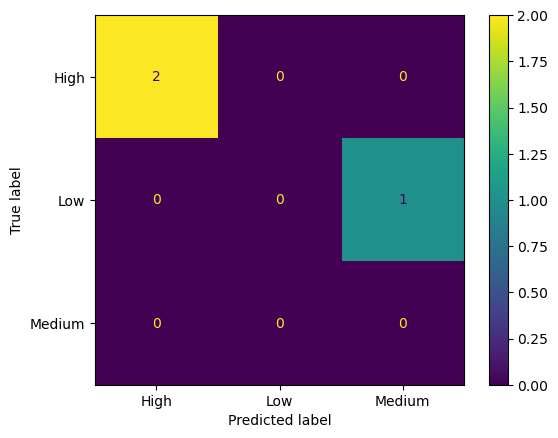

In [34]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=encoder.inverse_transform(classifier.classes_))
disp.plot()

<Axes: >

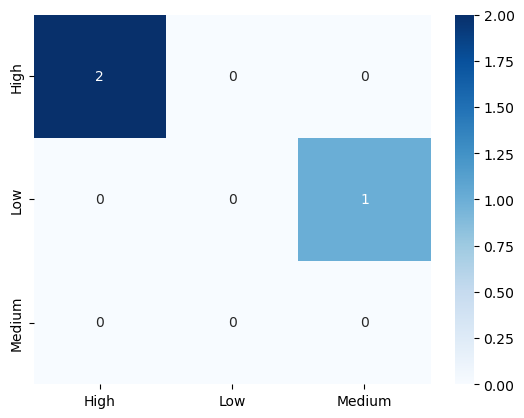

In [37]:
sns.heatmap(conf_matrix,cmap='Blues',annot=True,xticklabels=encoder.inverse_transform(classifier.classes_),yticklabels=encoder.inverse_transform(classifier.classes_))